### Importing Libraries

#### Imported important libraries for the data preprocessing as well as model building

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

1. the mlxtend library that provides implementations of various frequent pattern mining algorithms, including the Apriori algorithm.

In [2]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)
pd.set_option('display.expand_frame_repr', False)
from mlxtend.frequent_patterns import apriori, association_rules

### Data Prerocessing

##### accessing the dataset from the online retail datasheet for the year 2010-2011

In [4]:
df = pd.read_excel("Downloads/online_retail_II.xlsx", sheet_name = 'Year 2010-2011')

In [5]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      541910 non-null  object        
 1   StockCode    541910 non-null  object        
 2   Description  540456 non-null  object        
 3   Quantity     541910 non-null  int64         
 4   InvoiceDate  541910 non-null  datetime64[ns]
 5   Price        541910 non-null  float64       
 6   Customer ID  406830 non-null  float64       
 7   Country      541910 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [7]:
df.shape

(541910, 8)

In [8]:
df.describe()

,Quantity,Price,Customer ID
count,541910.000000,541910.000000,406830.000000
mean,9.552234,4.611138,15287.684160
std,218.080957,96.759765,1713.603074
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [9]:
# !pip install openpyxl

In [10]:
# checking for the unique values in each column for the futher analysis

In [11]:
df['Quantity'].nunique()

722

In [12]:
df['StockCode'].unique()

array(['85123A', 71053, '84406B', ..., '90214U', '47591b', 23843],
      dtype=object)

In [13]:
df['StockCode'].nunique()

4070

In [14]:
df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [15]:
df['Country'].nunique()

38

In [16]:
df['Customer ID'].unique() 

array([17850., 13047., 12583., ..., 13298., 14569., 12713.])

In [17]:
df['Customer ID'].nunique()

4372

### Checking for Missing or NaN values

In [18]:
df.isna().sum()

Invoice             0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
Price               0
Customer ID    135080
Country             0
dtype: int64

1. As we can see in the Description Column there 1454 NaN values
2. for the column Customer ID there are 135080 NaN vlaues or we can say that 135080 rows
3. To handle the missing values or NaN values we can directly drop or fill while seeing previous data

In [19]:
columns_to_backfill = ['Description', 'Customer ID']
df[columns_to_backfill] = df[columns_to_backfill].fillna(method='bfill')

In [20]:
df.isnull().head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False


In [21]:
df.isna().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

### creating a mask i.e boolian mask for those rows which has NaN or null values
1. extracting alll the rows having NaN or missing values

In [22]:
mask = df.isnull().any(axis = 1)
rows_with_nan = df[mask]

In [23]:
rows_with_nan

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country


In [24]:
rows_with_nan.shape

(0, 8)

1. As we can see that we have NaN value rows more than 1 lakh i.e 135080
2. For our analysis we will check for the upper outlier and lower outlier vlaues in the dataset and according to we will drop the values

In [25]:
rows_with_nan.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country


In [26]:
rows_with_nan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Invoice      0 non-null      object        
 1   StockCode    0 non-null      object        
 2   Description  0 non-null      object        
 3   Quantity     0 non-null      int64         
 4   InvoiceDate  0 non-null      datetime64[ns]
 5   Price        0 non-null      float64       
 6   Customer ID  0 non-null      float64       
 7   Country      0 non-null      object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 0.0+ bytes


In [27]:
data = df.copy()

In [28]:
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [29]:
data.shape

(541910, 8)

In [30]:
data.dropna(inplace = True)

In [31]:
data.isna().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [32]:
data.shape

(541910, 8)

### Data Preprocessing and Cleaning Part

In [33]:
def outlier_threshold(dataframe, variable):
    q1 = dataframe[variable].quantile(0.01)
    q3 = dataframe[variable].quantile(0.99)
    iqr = q3 - q1
    multiplier = 1.5

    upper_limit = q3 + (multiplier * iqr)
    lower_limit = q1 - (multiplier * iqr)

    return lower_limit, upper_limit


In the above code we calculates the lower and upper limits for outliers based on the 1st percentile (q1) and 99th percentile (q3) of the variable's values. The interquartile range (iqr) is computed as the difference between q3 and q1. The multiplier factor of 1.5 is then applied to the iqr to determine the threshold range. Finally, the lower and upper limits are returned as a tuple.

In [34]:
def replace_with_threshold(dataframe, variable):
    low_limit, up_limit = outlier_threshold(dataframe, variable)
    dataframe.loc[dataframe[variable] < low_limit, variable] = low_limit
    dataframe.loc[dataframe[variable] > up_limit, variable] = up_limit

In the above code,  the function first obtains the lower and upper limits using the outlier_threshold function. Then, it replaces the values in the variable column that are below the low_limit with the low_limit value using the loc accessor. Similarly, it replaces the values above the up_limit with the up_limit value. The modifications are made directly in the DataFrame.

In [35]:
def retail_data_prep(dataframe):
    dataframe = dataframe[~(dataframe['StockCode'] == 'POST')]
    dataframe = dataframe.dropna()
    dataframe = dataframe[~(dataframe['Invoice'].str.contains('C', na=False))]
    dataframe = dataframe[dataframe['Price'] > 0]

    replace_with_threshold(dataframe, 'Price')
    replace_with_threshold(dataframe, 'Quantity')

    return dataframe

In the above code,  the function removes rows where the StockCode column contains the value 'POST'. It then drops rows with missing values using dropna(). Next, it removes rows where the 'Invoice' column contains the letter 'C', indicating canceled invoices. After that, it filters out rows where the 'Price' column is less than or equal to 0.

Finally, it applies the replace_with_threshold function to handle outliers for the 'Price' and 'Quantity' columns. The modified DataFrame is returned at the end of the function.

In [36]:
df = retail_data_prep(df)

"df", is the modified DataFrame for the further process

In [37]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [38]:
# using info() function in pandas, we can find the cruecial information related to the dataset like summary of whole
# dataset exmpl: columns name, their counts, their datatypes etc.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 528978 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      528978 non-null  object        
 1   StockCode    528978 non-null  object        
 2   Description  528978 non-null  object        
 3   Quantity     528978 non-null  float64       
 4   InvoiceDate  528978 non-null  datetime64[ns]
 5   Price        528978 non-null  float64       
 6   Customer ID  528978 non-null  float64       
 7   Country      528978 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 36.3+ MB


In [39]:
df.shape  #it tells the number of rows and columns in the dataset

(528978, 8)

In [40]:
df.isna().sum() #this function used to find if there are missing values of NaN values in the dataset

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [41]:
df.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'Price', 'Customer ID', 'Country'], dtype='object')

In [42]:
# df1 for ploting the plot to see the relationship between the features of the data

In [43]:
df1 = df[['Quantity', 'InvoiceDate', 'Price', 'Customer ID']]

In [44]:
df1.head()

,Quantity,InvoiceDate,Price,Customer ID
0,6.0,2010-12-01 08:26:00,2.55,17850.0
1,6.0,2010-12-01 08:26:00,3.39,17850.0
2,8.0,2010-12-01 08:26:00,2.75,17850.0
3,6.0,2010-12-01 08:26:00,3.39,17850.0
4,6.0,2010-12-01 08:26:00,3.39,17850.0


In [45]:
# df1.plot()
import seaborn as sns

After data cleaning process we are seeing the unique values for further analysis

In [46]:
df['Customer ID'].nunique()

4344

In [47]:
df['Description'].unique()

array(['WHITE HANGING HEART T-LIGHT HOLDER', 'WHITE METAL LANTERN',
       'CREAM CUPID HEARTS COAT HANGER', ..., 'LETTER "U" BLING KEY RING',
       'CREAM HANGING HEART T-LIGHT HOLDER',
       'PAPER CRAFT , LITTLE BIRDIE'], dtype=object)

In [48]:
df['Description'].nunique()

4025

In [49]:
df['Quantity'].nunique()

203

In [50]:
df.describe()

,Quantity,Price,Customer ID
count,528978.000000,528978.000000,528978.000000
mean,9.565831,3.301532,15304.332154
std,21.535507,3.824420,1718.337533
min,1.000000,0.001000,12346.000000
25%,1.000000,1.250000,13969.000000
50%,3.000000,2.080000,15163.000000
75%,10.000000,4.130000,16809.000000
max,248.500000,41.940000,18287.000000


### Data Visualization Process to get some insight

1. Histogram
* A histogram can help you understand the distribution of numerical variables like Quantity or Price. This will allow you to observe patterns in the data and identify any outliers or unusual behavior.

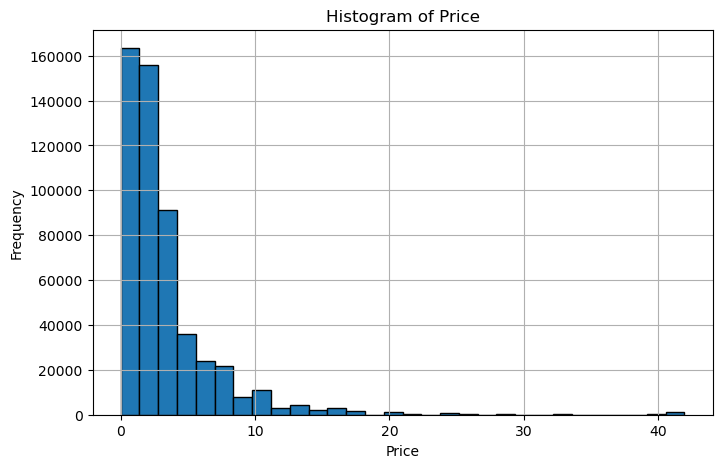

In [51]:
#the distribution of numerical variables like Quantity or Price
variable = 'Price'

# Created the histogram
plt.figure(figsize=(8, 5))
plt.hist(df[variable], bins=30, edgecolor='black')

plt.title('Histogram of ' + variable)
plt.xlabel(variable)
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

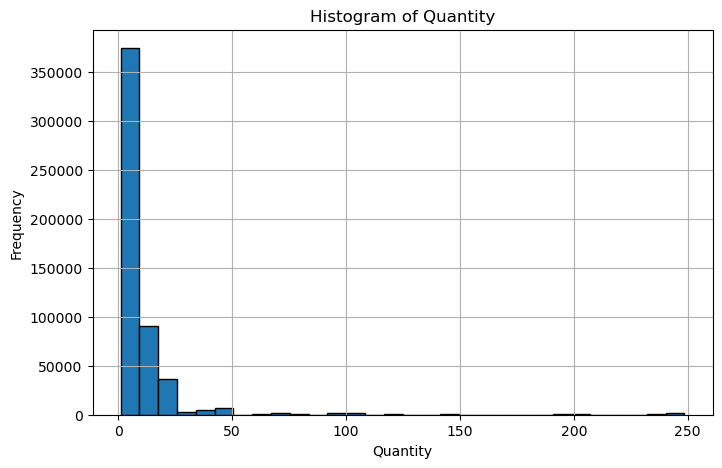

In [52]:
variable = 'Quantity'

# Created the histogram
plt.figure(figsize=(8, 5))
plt.hist(df[variable], bins=30, edgecolor='black')

plt.title('Histogram of ' + variable)
plt.xlabel(variable)
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

2. Scatter Plot between Quantity vs Price to see the behavour of intms over price

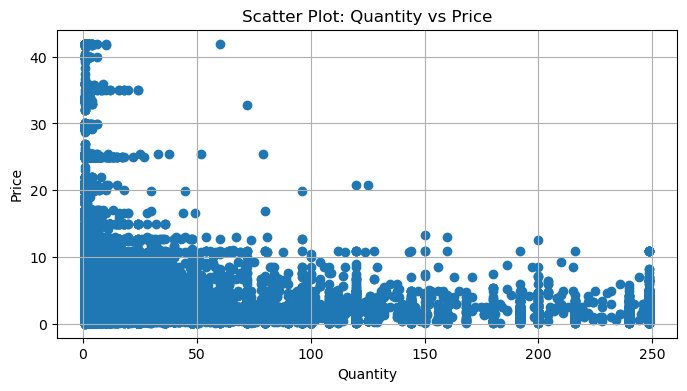

In [53]:
# scatter plot to see the replationship between quantity and price of the items
x = 'Quantity'  
y = 'Price'  

# Creating the scatter plot
plt.figure(figsize=(8, 4))
plt.scatter(df[x], df[y])

plt.title('Scatter Plot: ' + x + ' vs ' + y)
plt.xlabel(x)
plt.ylabel(y)
plt.grid(True)

# to display the plot
plt.show()

In [54]:
# df.info()
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [55]:
# time series visualization on Price of items during time like monthly, yearly, daily etc.
df.set_index('InvoiceDate', inplace=True)

/var/folders/d_/khm1wzzs6xj6gk54p5gns4780000gn/T/ipykernel_11223/3641262302.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  resampled_data = df.resample('M').sum()


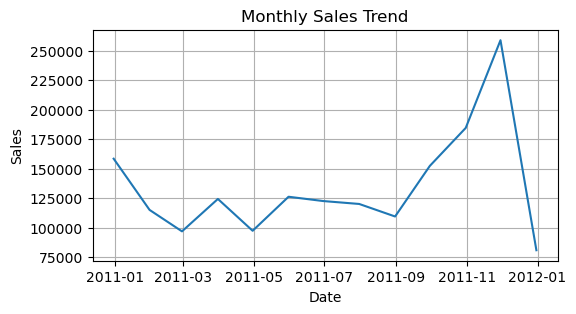

In [56]:
# Resampling the data by a specific time period, e.g., monthly or daily
resampled_data = df.resample('M').sum()
# Create the time series plot
plt.figure(figsize=(6, 3))
plt.plot(resampled_data.index, resampled_data['Price'])
# Customize the plot
plt.title('Monthly Sales Trend')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

In [57]:
df.reset_index()

,InvoiceDate,Invoice,StockCode,Description,Quantity,Price,Customer ID,Country
0,2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2.55,17850.0,United Kingdom
1,2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6.0,3.39,17850.0,United Kingdom
2,2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2.75,17850.0,United Kingdom
3,2010-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,3.39,17850.0,United Kingdom
4,2010-12-01 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
528973,2011-12-09 12:50:00,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12.0,0.85,12680.0,France
528974,2011-12-09 12:50:00,581587,22899,CHILDREN'S APRON DOLLY GIRL,6.0,2.10,12680.0,France
528975,2011-12-09 12:50:00,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4.0,4.15,12680.0,France
528976,2011-12-09 12:50:00,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4.0,4.15,12680.0,France


### Model Building

##### Preparing Association Rule Learning Data Structures and Association Rules Analysis
##### 1. Apriori Algorithm

Apriori Algorithm is a technique used for market basket analysis, which aims to discover associations between items that are frequently purchased together.

Metrics:
1) Support(X, Y) = Freq(X, Y) / N

Support measures the probability of the co-occurrence of items X and Y in the transactions. It is calculated by dividing the frequency of transactions containing both X and Y by the total number of transactions.

2) Confidence(X, Y) = Freq(X, Y) / Freq(X)

Confidence measures the conditional probability of item Y being purchased given that item X is already purchased. It is calculated by dividing the frequency of transactions containing both X and Y by the frequency of transactions containing X.

3) Lift = Support(X, Y) / (Support(X) * Support(Y))

Lift quantifies the strength of the association between items X and Y. It compares the observed support of X and Y occurring together to what would be expected if X and Y were statistically independent. A lift value greater than 1 indicates a positive association, meaning the occurrence of item X increases the likelihood of item Y being purchased.

These metrics help in identifying meaningful associations between items in a dataset. By analyzing support, confidence, and lift values, one can uncover item associations that can be utilized for various purposes such as targeted marketing, product placement, or recommendation systems.

* Generally, association rules are written in “IF-THEN” format. We can also use the term “Antecedent” for IF (LHS) and “Consequent” for THEN (RHS)

In [58]:
def create_invoice_product_df(dataframe, id=False):
    if id:
        return dataframe.groupby(['Invoice', 'StockCode'])['Quantity'].sum().unstack().fillna(0).applymap(lambda x: 1 if x > 0 else 0)
    else:
        return dataframe.groupby(['Invoice', 'Description'])['Quantity'].sum().unstack().fillna(0).applymap(lambda x: 1 if x > 0 else 0)

def create_rules(dataframe, id=True, country='Germany'):
    dataframe = dataframe[dataframe['Country'] == country]
    dataframe = create_invoice_product_df(dataframe, id)
    frequent_itemsets = apriori(dataframe, min_support=0.01, use_colnames=True)
    rules = association_rules(frequent_itemsets, metric='support', min_threshold=0.01)
    return rules

the above code provides a way to generate association rules for product transactions in a given dataframe, filtered by a specific country if desired. The create_invoice_product_df function prepares the data by converting it into a binary representation, and the create_rules function performs association rule mining on the transformed data.

In [59]:
recom_rules = create_rules(df)

/Users/anujkumar/anaconda3/lib/python3.10/site-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [60]:
recom_rules.sort_values(by = 'lift', ascending = False).tail(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
2339,(22326),(85099B),0.249443,0.080178,0.017817,0.071429,0.890873,-0.002183,0.990577,-0.140306
2420,(22328),(22961),0.160356,0.093541,0.013363,0.083333,0.890873,-0.001637,0.988864,-0.127315
2451,(23240),(22328),0.077951,0.160356,0.011136,0.142857,0.890873,-0.001364,0.979584,-0.117271
2338,(85099B),(22326),0.080178,0.249443,0.017817,0.222222,0.890873,-0.002183,0.965002,-0.117521
2421,(22961),(22328),0.093541,0.160356,0.013363,0.142857,0.890873,-0.001637,0.979584,-0.119048
2450,(22328),(23240),0.160356,0.077951,0.011136,0.069444,0.890873,-0.001364,0.990859,-0.127315
2171,(22326),(22625),0.249443,0.055679,0.011136,0.044643,0.801786,-0.002753,0.988448,-0.247768
2170,(22625),(22326),0.055679,0.249443,0.011136,0.200000,0.801786,-0.002753,0.938196,-0.207477
2225,(22326),(22961),0.249443,0.093541,0.017817,0.071429,0.763605,-0.005516,0.976186,-0.292017
2224,(22961),(22326),0.093541,0.249443,0.017817,0.190476,0.763605,-0.005516,0.927158,-0.254579


### Output for User Recommendation

In [61]:
# def check_id(df, stock_code):
#     i = 0
#     product_name = None
#     while i < len(df):
#         if df.loc[i, 'StockCode'] == stock_code:
#             product_name = df.loc[i, 'Description']
#             break
#         i += 1
#     return product_name

def check_id(df, stock_code):
    matching_rows = df[df['StockCode'] == stock_code]
    product_name = matching_rows['Description'].values[0] if not matching_rows.empty else None
    return product_name

the check_id function allows you to look up the product name associated with a specific stock code in a given dataframe. It returns the product name if a match is found, or None if no match is found.

In [62]:
# def arl_recommender(rules_df, product_id):
#     sorted_rules = rules_df.sort_values(by='lift', ascending=False)
#     idx = 0
#     while idx < len(sorted_rules):
#         product = sorted_rules.iloc[idx]['antecedents']
#         for j in list(product):
#             if j == product_id:
#                 return list(sorted_rules.iloc[idx]['consequents'])[0]
#         idx += 1

def arl_recommender(rules_df, product_id):
  sorted_rules = rules_df.sort_values(by='lift', ascending=False)
  for idx, product in enumerate(sorted_rules['antecedents']):
    for j in list(product):
      if j == product_id:
        return list(sorted_rules.iloc[idx]['consequents'])[0]

the above code sorts association rules based on their lift values and finds a recommendation by checking the antecedents of each rule for a match with the given product ID. If a match is found, the first consequent of that rule is returned as the recommendation.

In [63]:
# product_list = [21987, 23235, 22747]
# recom_list = []

# for product in product_list:
#   recom_list.append(arl_recommender(recom_rules, product))
product_list = [21987, 23235, 22747]
recom_list = []

for product in product_list:
  recom_list.append(arl_recommender(recom_rules, product))

the above code give you recommendation list of the product

In [64]:
df.head()

,Invoice,StockCode,Description,Quantity,Price,Customer ID,Country
InvoiceDate,,,,,,,
2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2.55,17850.0,United Kingdom
2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6.0,3.39,17850.0,United Kingdom
2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2.75,17850.0,United Kingdom
2010-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,3.39,17850.0,United Kingdom
2010-12-01 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,3.39,17850.0,United Kingdom


In [65]:
df['StockCode'].unique()

array(['85123A', 71053, '84406B', ..., '90214U', '47591b', 23843],
      dtype=object)

In [66]:
df[df['StockCode'] == 21987]

,Invoice,StockCode,Description,Quantity,Price,Customer ID,Country
InvoiceDate,,,,,,,
2010-12-02 12:47:00,536732,21987,PACK OF 6 SKULL PAPER CUPS,12.0,0.65,15544.0,United Kingdom
2010-12-05 12:13:00,537126,21987,PACK OF 6 SKULL PAPER CUPS,5.0,0.65,18118.0,United Kingdom
2010-12-14 13:11:00,538841,21987,PACK OF 6 SKULL PAPER CUPS,6.0,0.65,16899.0,United Kingdom
2010-12-14 16:07:00,538886,21987,PACK OF 6 SKULL PAPER CUPS,12.0,0.65,13846.0,United Kingdom
2010-12-20 14:10:00,539607,21987,PACK OF 6 SKULL PAPER CUPS,12.0,0.65,12681.0,France
...,...,...,...,...,...,...,...
2011-11-22 16:02:00,578072,21987,PACK OF 6 SKULL PAPER CUPS,3.0,0.65,17759.0,United Kingdom
2011-11-28 13:26:00,579152,21987,PACK OF 6 SKULL PAPER CUPS,12.0,0.65,12479.0,Germany
2011-12-05 16:28:00,580705,21987,PACK OF 6 SKULL PAPER CUPS,12.0,0.65,12683.0,France


In [67]:
df[df['StockCode'] == 71053].nunique()

Invoice        333
StockCode        1
Description      2
Quantity        21
Price            4
Customer ID    213
Country          4
dtype: int64

In [68]:
df[df['StockCode'] == 71053]

,Invoice,StockCode,Description,Quantity,Price,Customer ID,Country
InvoiceDate,,,,,,,
2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6.0,3.39,17850.0,United Kingdom
2010-12-01 09:02:00,536373,71053,WHITE METAL LANTERN,6.0,3.39,17850.0,United Kingdom
2010-12-01 09:32:00,536375,71053,WHITE METAL LANTERN,6.0,3.39,17850.0,United Kingdom
2010-12-01 10:51:00,536396,71053,WHITE METAL LANTERN,6.0,3.39,17850.0,United Kingdom
2010-12-01 11:33:00,536406,71053,WHITE METAL LANTERN,8.0,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...
2011-12-07 14:12:00,581149,71053,WHITE MOROCCAN METAL LANTERN,1.0,3.75,15471.0,United Kingdom
2011-12-07 14:12:00,581149,71053,WHITE MOROCCAN METAL LANTERN,1.0,3.75,15471.0,United Kingdom
2011-12-08 09:28:00,581219,71053,WHITE MOROCCAN METAL LANTERN,1.0,8.29,13924.0,United Kingdom


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 528978 entries, 2010-12-01 08:26:00 to 2011-12-09 12:50:00
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      528978 non-null  object 
 1   StockCode    528978 non-null  object 
 2   Description  528978 non-null  object 
 3   Quantity     528978 non-null  float64
 4   Price        528978 non-null  float64
 5   Customer ID  528978 non-null  float64
 6   Country      528978 non-null  object 
dtypes: float64(3), object(4)
memory usage: 32.3+ MB


In [70]:
recom_list

[21989, 23244, 22746]

In [71]:
for product in product_list:
  print(check_id(df, product))

PACK OF 6 SKULL PAPER CUPS
STORAGE TIN VINTAGE LEAF
POPPY'S PLAYHOUSE BATHROOM


the above code generate the orignal items from the data

In [72]:
for recom in recom_list:
  print(check_id(df, recom))

PACK OF 20 SKULL PAPER NAPKINS
ROUND STORAGE TIN VINTAGE LEAF
POPPY'S PLAYHOUSE LIVINGROOM 


this above code is giving you the recommendation items i.e final product